In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Model
from skimage.color import gray2rgb
import cv2
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras_vggface.vggface import VGGFace
from keras.applications.vgg16 import VGG16

from keras.layers import Dense, Flatten, Input
% matplotlib inline


<function matplotlib.pyplot.show>

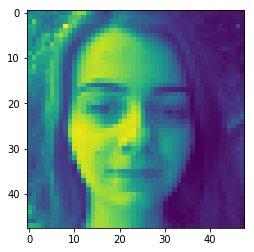

In [39]:
img = cv2.imread('denisa.jpg', 0)
plt.imshow(img)
plt.show

In [28]:
model_vgg16_conv = VGG16(include_top=False, weights=None)

input = Input(shape=(48, 48, 3), name='image_input')

output_vgg16_conv = model_vgg16_conv(input)

x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(7, activation='softmax', name='predictions')(x)
model = Model(inputs=input, outputs=x)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [29]:
model.load_weights('vgg16_sec/model.h5')

In [40]:
img2 = gray2rgb(img)
print(img2.shape)
img2 = img2.reshape(-1, 48, 48, 3)
prediction = np.argmax(model.predict(img2))
print(prediction)
EMOTIONS_DICT = {0: 'Angry', 1: 'Disgust', 2: 'Fear',
                 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
plt.imshow(img)
plt.title(EMOTIONS_DICT[prediction])

(48, 48, 3)
3
